In [10]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from normalMode import Chinook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [11]:
f = 49
sd = 76
c_w = 1500
c_b = 1800
rho_w = 1000
rho_b = 1800
atten = 0.2
d = 100
world = acousticEnv()
world.pekeris(c_w, c_b, rho_w, rho_b, atten, d)

In [12]:
zPlot = np.r_[1:150:100j]
rPlot = np.r_[10:10000:200j]

In [13]:
nm_model = Chinook(f, world)
nm_model.calculateModes_shooting()

In [14]:
# nm_model.calculateModes_eig(200, 10)

In [15]:
p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)
print(nm_model.countNumberModes())

4


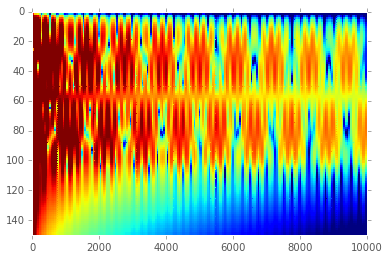

In [16]:
R_nm, Z = np.meshgrid(p_nm.index, p_nm.columns)
TL_nm = 20 * np.log10(np.abs(p_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_nm))
plt.clim(-80, -50)
plt.xlim(0, 10000)
plt.ylim(150,0)
plt.show()

In [17]:
vz_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)

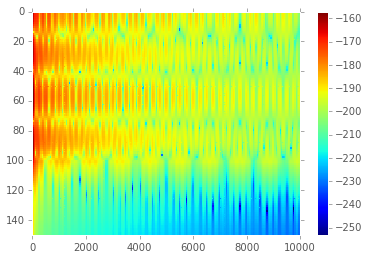

In [18]:
R_nm, Z = np.meshgrid(vz_nm.index, vz_nm.columns)
TL_vel_nm = 20 * np.log10(np.abs(vz_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_vel_nm))
# plt.clim(-190, -140)
plt.xlim(0, 10000)
plt.ylim(150,0)
plt.colorbar()
plt.show()